In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
# Cargar los datasets
credits = pd.read_csv('Dataset_Procesados/processed_credits_dataset.csv')
movies = pd.read_csv('Dataset_Procesados/processed_movies_dataset.csv')

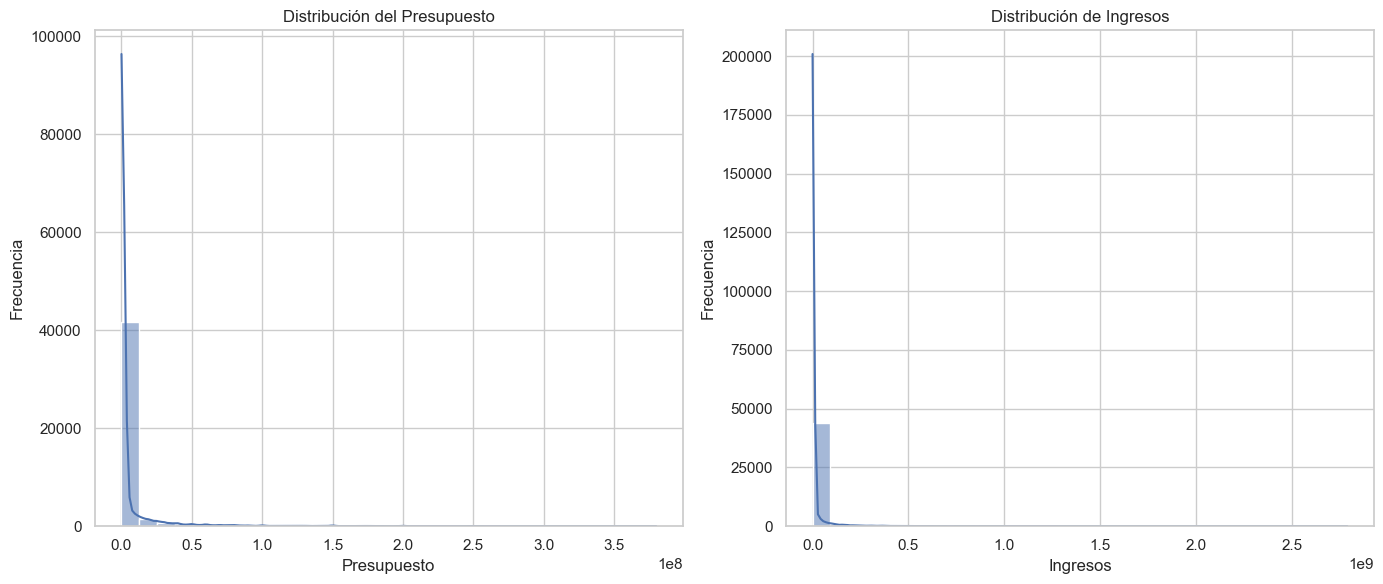

In [13]:
# Configuración de estilo
sns.set(style="whitegrid")

# Histogramas de presupuesto y ingresos
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(movies['budget'], bins=30, kde=True)
plt.title('Distribución del Presupuesto')
plt.xlabel('Presupuesto')
plt.ylabel('Frecuencia')

plt.subplot(1, 2, 2)
sns.histplot(movies['revenue'], bins=30, kde=True)
plt.title('Distribución de Ingresos')
plt.xlabel('Ingresos')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

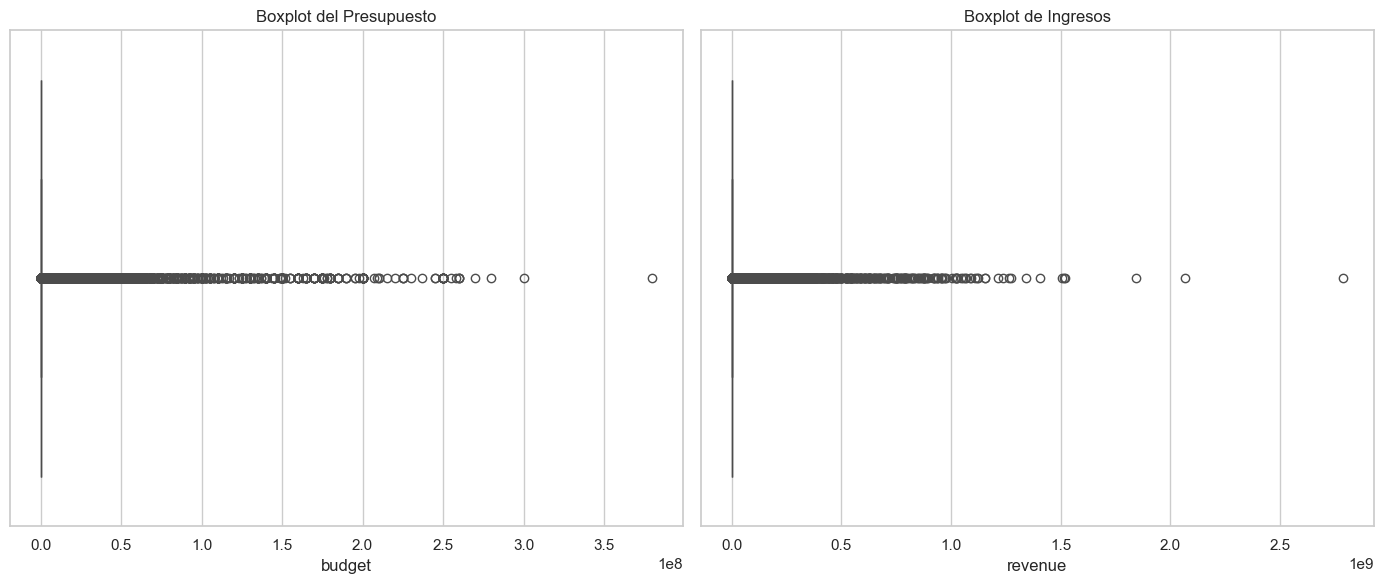

In [15]:
# Boxplot de ingresos y presupuesto
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x=movies['budget'])
plt.title('Boxplot del Presupuesto')

plt.subplot(1, 2, 2)
sns.boxplot(x=movies['revenue'])
plt.title('Boxplot de Ingresos')

plt.tight_layout()
plt.show()

In [17]:

# Tendencia de películas estrenadas por año
movies['release_year'] = movies['release_date'].dt.year
plt.figure(figsize=(12, 6))
sns.countplot(x='release_year', data=movies)
plt.title('Número de Películas Estrenadas por Año')
plt.xticks(rotation=45)
plt.show()

# Presupuesto promedio por año
avg_budget_by_year = movies.groupby('release_year')['budget'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(x='release_year', y='budget', data=avg_budget_by_year)
plt.title('Presupuesto Promedio por Año')
plt.xticks(rotation=45)
plt.show()

# Ingresos promedio por año
avg_revenue_by_year = movies.groupby('release_year')['revenue'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(x='release_year', y='revenue', data=avg_revenue_by_year)
plt.title('Ingresos Promedio por Año')
plt.xticks(rotation=45)
plt.show()

AttributeError: Can only use .dt accessor with datetimelike values

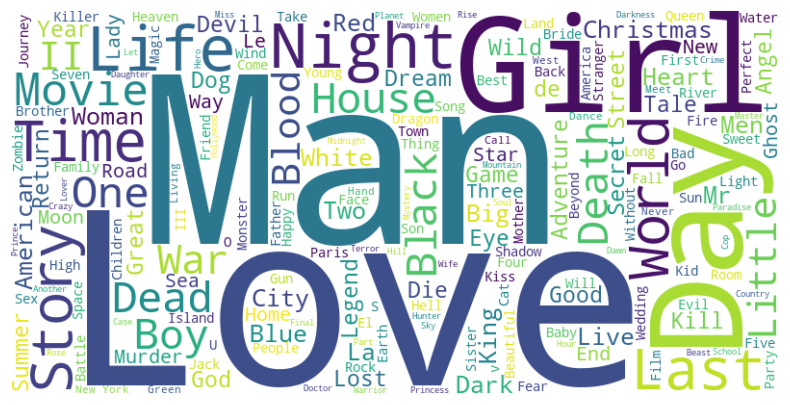

In [11]:
# Asegúrate de que la columna de títulos no tenga NaN y conviértela a string
movies['title'] = movies['title'].astype(str)  # Convierte todos los títulos a string

# Unir todos los títulos en una sola cadena
text = ' '.join(movies['title'].dropna())  # Elimina NaN antes de unir
# Crear una nube de palabras
text = ' '.join(movies['title'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()